1.Find the top 5 similar cars to toyota corona mark ii

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
df = pd.read_csv('auto-mpg.csv')


In [77]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df_clean = df.dropna()

In [78]:
data1=data.select_dtypes(include=np.number).copy()

In [79]:
data1.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


In [80]:
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
X = df_clean[features]

In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
target_idx = df_clean[df_clean['car name'].str.contains('toyota corona mark ii', case=False)].index


In [83]:
if len(target_idx) == 0:
    print("Toyota Corona Mark II not found in dataset.")
else:
  target_vector = X_scaled[target_idx[0]]

In [84]:


    dot_products = np.dot(X_scaled, target_vector)
    dot_top_indices = dot_products.argsort()[::-1]
    dot_top_indices = [i for i in dot_top_indices if i != target_idx[0]][:5]

    print("Top 5 similar cars using DOT PRODUCT:")
    print(df_clean.iloc[dot_top_indices][['car name', 'mpg', 'horsepower', 'weight']])




Top 5 similar cars using DOT PRODUCT:
                car name   mpg  horsepower  weight
111            maxda rx3  18.0        90.0    2124
144        toyota corona  31.0        52.0    1649
329  honda civic 1500 gl  44.6        67.0    1850
343       toyota starlet  39.1        58.0    1755
345     honda civic 1300  35.1        60.0    1760


2.Find completely unique/orthogonal car to toyota corona mark ii

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


In [86]:
cos_similarities = cosine_similarity([target_vector], X_scaled)[0]

In [87]:
min_dot_index = dot_products.argmin()
most_orthogonal_dot = df_clean.iloc[min_dot_index]

In [88]:
min_cos_index = cos_similarities.argmin()
most_orthogonal_cos = df_clean.iloc[min_cos_index]

In [89]:
print("Most orthogonal car based on DOT PRODUCT:")
print(most_orthogonal_dot[['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

print("\nMost orthogonal car based on COSINE SIMILARITY:")
print(most_orthogonal_cos[['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

Most orthogonal car based on DOT PRODUCT:
car name        buick electra 225 custom
mpg                                 12.0
cylinders                              8
displacement                       455.0
horsepower                         225.0
weight                              4951
acceleration                        11.0
Name: 95, dtype: object

Most orthogonal car based on COSINE SIMILARITY:
car name        cadillac eldorado
mpg                          23.0
cylinders                       8
displacement                350.0
horsepower                  125.0
weight                       3900
acceleration                 17.4
Name: 298, dtype: object


3. Project the data to a 2-dimentional space and visualize using scatter plot

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [92]:
target_index = df_clean[df_clean['car name'].str.contains('toyota corona mark ii', case=False)].index[0]
cos_sim = cosine_similarity([X_scaled[target_index]], X_scaled)[0]
most_orthogonal_index = cos_sim.argmin()


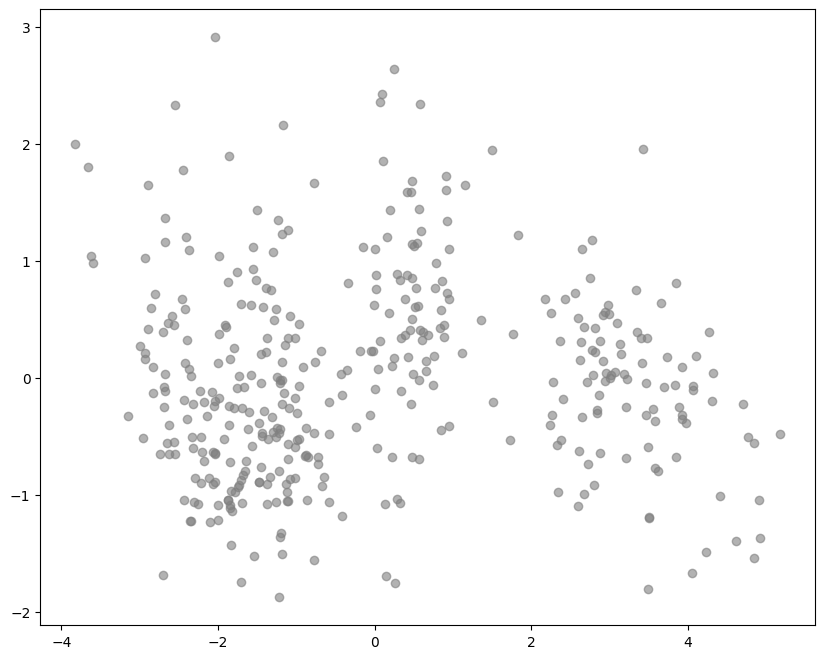

In [93]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='gray', label='Other Cars')


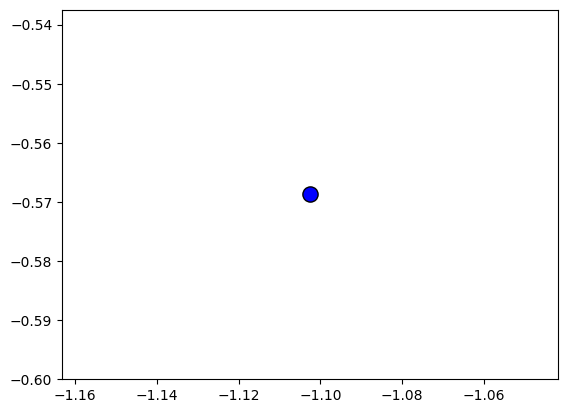

In [94]:
plt.scatter(X_pca[target_index, 0], X_pca[target_index, 1], color='blue', label='Toyota Corona Mark II', s=120, edgecolor='black')


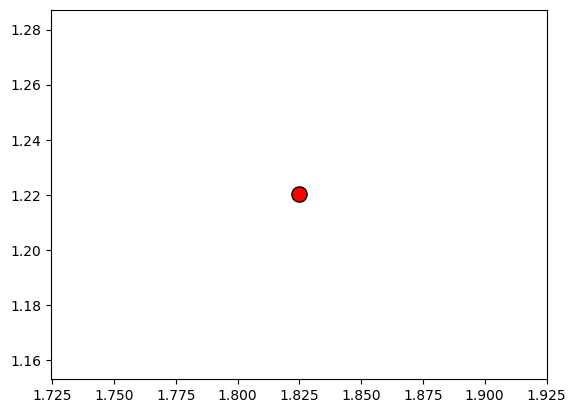

In [95]:
plt.scatter(X_pca[most_orthogonal_index, 0], X_pca[most_orthogonal_index, 1], color='red', label='Most Orthogonal Car', s=120, edgecolor='black')


Text(1.9247292020993552, 1.2201213470145011, 'cadillac eldorado')

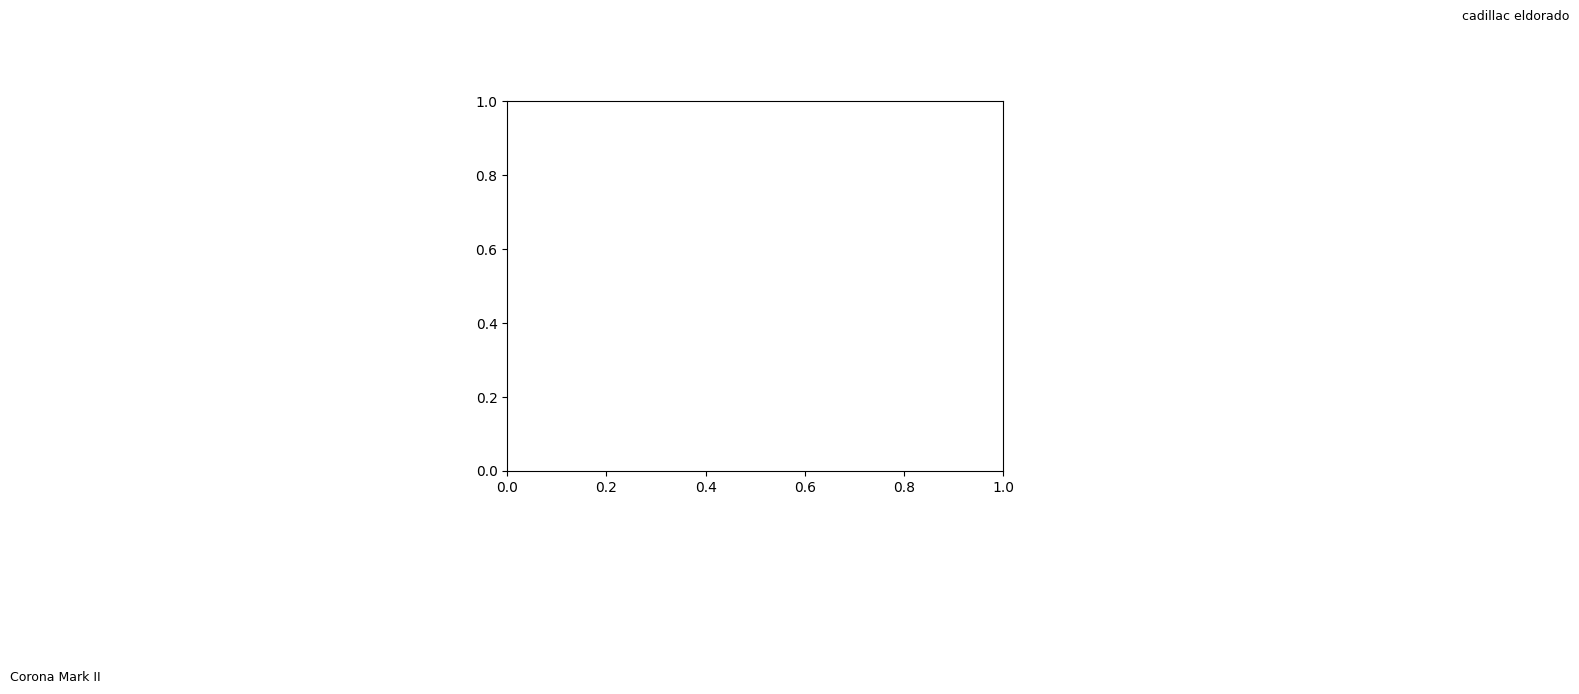

In [96]:
plt.text(X_pca[target_index, 0]+0.1, X_pca[target_index, 1], "Corona Mark II", fontsize=9)
plt.text(X_pca[most_orthogonal_index, 0]+0.1, X_pca[most_orthogonal_index, 1], df_clean.iloc[most_orthogonal_index]['car name'], fontsize=9)


/tmp/ipython-input-97-733007277.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


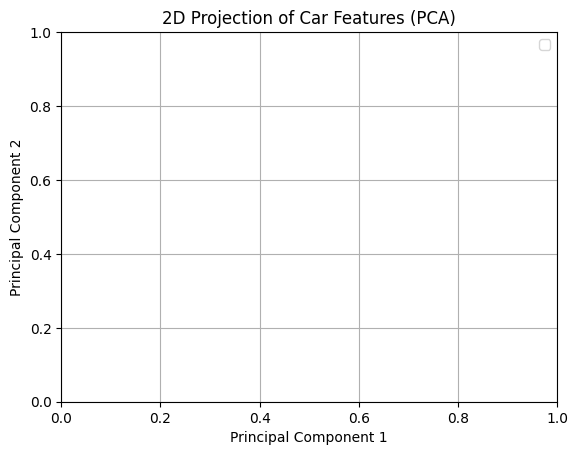

In [97]:
plt.title('2D Projection of Car Features (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

4. Write a function that returns dot product of two list of numbers

In [98]:
def dot_product(a, b):

    if len(a) != len(b):
        raise ValueError("Vectors must be the same length")

    return sum(x * y for x, y in zip(a, b))


vec1 = [1, 2, 3]
vec2 = [4, 5, 6]
result = dot_product(vec1, vec2)
print("Dot product:", result)


Dot product: 32


5. Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [99]:
import numpy as np

def vector_projection(a, b):
  a = np.array(a)
  b = np.array(b)

  if b.dot(b) == 0:
        raise ValueError("Cannot project onto the zero vector")

  projection = (np.dot(a, b) / np.dot(b, b)) * b
  return projection
  a = [3, 4]
  b = [1, 2]
  proj = vector_projection_np(a, b)
  print("Projection of a onto b:", proj)

6. Create a class Vector that supports addition, dot product, and magnitude

In [101]:
class Vector:
    def __init__(self, components):
        self.components = np.array(components, dtype=float)

    def __add__(self, other):
        if self.components.shape != other.components.shape:
            raise ValueError("Vectors must be the same shape for addition")
        return Vector(self.components + other.components)

    def dot(self, other):
        if self.components.shape != other.components.shape:
            raise ValueError("Vectors must be the same shape for dot product")
        return np.dot(self.components, other.components)

    def magnitude(self):
        return np.linalg.norm(self.components)

    def __repr__(self):
        return f"Vector({self.components})"
v1 = Vector([1, 2, 3])
v2 = Vector([4, 5, 6])

print("v1 + v2 =", v1 + v2)
print("v1 • v2 =", v1.dot(v2))
print("|v1| =", v1.magnitude())

v1 + v2 = Vector([5. 7. 9.])
v1 • v2 = 32.0
|v1| = 3.7416573867739413


7. Write a function that returns the L1 and L2 norms of a vector given as list

In [105]:
def compute_norms(vector):
  vec = np.array(vector, dtype=float)

  l1 = np.sum(np.abs(vec))
  l2 = np.sqrt(np.sum(vec ** 2))

  return l1, l2
  vec = [3, -4, 1]
  l1, l2 = compute_norms(vec)
  print("L1 norm:", l1)
  print("L2 norm:", l2)